In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
csidf = pd.read_excel("subcarriers_amp_pos_pot.xlsx", sheet_name="subcarriers_amp_pos_pot")
csidf.drop("Unnamed: 0", axis=1, inplace=True)
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0,0,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0,0,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0,0,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,DIR,A1,1,3,82,2482,19.157725,33.949590,0,0,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,DIR,A1,1,3,43,736,16.433430,28.670187,0,0,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214


In [3]:
#Divisão dos dados em conjunto de treino e teste
from sklearn.model_selection import train_test_split #Importa a função de split

In [4]:
#Dados do LLTF
csidf[csidf.columns[8:70]].head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,...,LLTF_22,LLTF_23,LLTF_24,LLTF_25,LLTF_26,LLTF_27,LLTF_28,LLTF_29,LLTF_30,LLTF_31
0,0,0,0,0,0,4.123106,15.297059,16.124515,17.029386,18.027756,...,11.180340,10.049876,9.000000,8.062258,7.071068,1.000000,0,0,0,0
1,0,0,0,0,0,5.000000,17.029386,17.117243,18.439089,19.646883,...,13.038405,11.180340,10.198039,9.486833,9.848858,3.162278,0,0,0,0
2,0,0,0,0,0,4.000000,17.029386,17.117243,17.464249,19.924859,...,11.000000,10.049876,9.219544,8.246211,7.615773,1.414214,0,0,0,0
3,0,0,0,0,0,4.123106,17.464249,17.492856,18.601075,20.615528,...,11.661904,10.000000,9.219544,8.485281,7.810250,2.236068,0,0,0,0
4,0,0,0,0,0,3.162278,14.866069,15.524175,16.278821,18.248288,...,10.000000,8.944272,7.615773,7.280110,6.082763,1.000000,0,0,0,0


In [5]:
#Dados do HT-LTF
csidf[csidf.columns[70:134]].head()

,HTLTF_-32,HTLTF_-31,HTLTF_-30,HTLTF_-29,HTLTF_-28,HTLTF_-27,HTLTF_-26,HTLTF_-25,HTLTF_-24,HTLTF_-23,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,1.000000,1.414214,2.000000,5.656854,29.832868,29.068884,30.805844,32.140317,34.000000,37.215588,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,1.000000,0.000000,2.236068,5.830952,29.154759,29.410882,32.000000,33.241540,35.693137,38.327536,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,1.414214,1.000000,1.000000,5.000000,28.653098,29.120440,32.015621,33.376639,35.171011,38.275318,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,0.000000,1.000000,2.236068,6.082763,32.062439,31.400637,33.615473,34.132096,36.400549,38.948684,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,1.414214,1.414214,1.414214,4.123106,25.079872,26.248809,28.653098,31.384710,33.241540,34.713110,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214


In [6]:
#Dados LLTF + HT-LTF
csidf[csidf.columns[8:134]].head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,0,0,0,0,0,4.123106,15.297059,16.124515,17.029386,18.027756,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,0,0,0,0,0,5.000000,17.029386,17.117243,18.439089,19.646883,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,0,0,0,0,0,4.000000,17.029386,17.117243,17.464249,19.924859,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,0,0,0,0,0,4.123106,17.464249,17.492856,18.601075,20.615528,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,0,0,0,0,0,3.162278,14.866069,15.524175,16.278821,18.248288,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214


In [7]:
##### NORMALIZANDO OS DADOS USANDO O STANDARDSCALER!!
from sklearn.preprocessing import StandardScaler #Importa o standardscaler do scikit-learn
scaler = StandardScaler() #Cria um objet StandardScaler()  chamado scaler
csidf.drop(csidf.columns[:8],axis=1).head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,0,0,0,0,0,4.123106,15.297059,16.124515,17.029386,18.027756,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,0,0,0,0,0,5.000000,17.029386,17.117243,18.439089,19.646883,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,0,0,0,0,0,4.000000,17.029386,17.117243,17.464249,19.924859,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,0,0,0,0,0,4.123106,17.464249,17.492856,18.601075,20.615528,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,0,0,0,0,0,3.162278,14.866069,15.524175,16.278821,18.248288,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214


In [9]:
scaler.fit(csidf.drop(csidf.columns[:8],axis=1)) #Usa o método fit para treinar o modelo

C:\Users\iande\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
#** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **
scaled_features = scaler.transform(csidf.drop(csidf.columns[:8],axis=1))

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [11]:
#** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **
df_feat = pd.DataFrame(scaled_features,columns=csidf.columns[8:])
df_feat.head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,0.0,0.0,0.0,0.0,0.0,0.182844,-0.015516,0.149067,0.201551,0.125525,...,-1.535694,-1.607707,-1.629812,-1.692946,-1.651328,-1.755265,-1.656862,-1.749149,-2.371981,0.906988
1,0.0,0.0,0.0,0.0,0.0,0.877877,0.365508,0.371093,0.517897,0.477087,...,-1.331682,-1.260266,-1.363416,-1.398726,-1.319093,-1.434603,-1.503478,-0.992786,0.253550,-1.849046
2,0.0,0.0,0.0,0.0,0.0,0.085269,0.365508,0.371093,0.299137,0.537445,...,-1.644939,-1.704147,-1.581282,-1.615773,-1.679059,-1.681502,-1.744078,-1.749149,-1.197808,0.906988
3,0.0,0.0,0.0,0.0,0.0,0.182844,0.461156,0.455100,0.554248,0.687410,...,-1.549643,-1.562538,-1.629812,-1.644775,-1.601015,-1.773170,-1.827942,-1.879529,-2.371981,0.099764
4,0.0,0.0,0.0,0.0,0.0,-0.578716,-0.110312,0.014800,0.033119,0.173409,...,-1.749767,-1.771162,-1.830447,-1.867078,-1.812326,-1.728813,-1.791999,-1.749149,-1.197808,0.906988


In [12]:
csidf_norm = csidf[csidf.columns[0:8]]
csidf_norm.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF
0,DIR,A1,1,3,68,1763,18.326305,32.462711
1,DIR,A1,1,3,91,2902,19.625982,34.627993
2,DIR,A1,1,3,79,1819,19.009755,32.599737
3,DIR,A1,1,3,82,2482,19.157725,33.949590
4,DIR,A1,1,3,43,736,16.433430,28.670187


In [13]:
csidf_norm = pd.concat([csidf_norm, df_feat], axis=1)
csidf_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Columns: 134 entries, device to HTLTF_31
dtypes: float64(128), int64(4), object(2)
memory usage: 2.0+ MB


In [14]:
csidf_norm.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0.0,0.0,...,-1.535694,-1.607707,-1.629812,-1.692946,-1.651328,-1.755265,-1.656862,-1.749149,-2.371981,0.906988
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0.0,0.0,...,-1.331682,-1.260266,-1.363416,-1.398726,-1.319093,-1.434603,-1.503478,-0.992786,0.253550,-1.849046
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0.0,0.0,...,-1.644939,-1.704147,-1.581282,-1.615773,-1.679059,-1.681502,-1.744078,-1.749149,-1.197808,0.906988
3,DIR,A1,1,3,82,2482,19.157725,33.949590,0.0,0.0,...,-1.549643,-1.562538,-1.629812,-1.644775,-1.601015,-1.773170,-1.827942,-1.879529,-2.371981,0.099764
4,DIR,A1,1,3,43,736,16.433430,28.670187,0.0,0.0,...,-1.749767,-1.771162,-1.830447,-1.867078,-1.812326,-1.728813,-1.791999,-1.749149,-1.197808,0.906988


In [16]:
#Usando LLTF apenas e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:70]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 67.19%
Total de acerto da repeticao 1: 67.45%
Total de acerto da repeticao 2: 70.31%
Total de acerto da repeticao 3: 68.23%
Total de acerto da repeticao 4: 71.35%
Total de acerto da repeticao 5: 68.49%
Total de acerto da repeticao 6: 68.23%
Total de acerto da repeticao 7: 67.45%
Total de acerto da repeticao 8: 67.19%
Total de acerto da repeticao 9: 69.27%


In [38]:
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.5625,0.59375,0.875,0.71875,0.53125,0.84375,0.84375,0.65625,0.625,0.78125,0.4375,0.59375,67.19
1,0.46875,0.75,0.8125,0.75,0.28125,0.71875,0.875,0.53125,0.75,0.75,0.6875,0.71875,67.45
2,0.5625,0.59375,0.84375,0.75,0.4375,0.75,0.90625,0.6875,0.6875,0.6875,0.75,0.78125,70.31
3,0.625,0.53125,0.84375,0.75,0.28125,0.8125,0.875,0.53125,0.875,0.65625,0.71875,0.6875,68.23
4,0.625,0.625,0.8125,0.84375,0.28125,0.75,0.9375,0.78125,0.8125,0.65625,0.6875,0.75,71.35
5,0.65625,0.59375,0.875,0.65625,0.46875,0.65625,0.90625,0.65625,0.78125,0.625,0.71875,0.625,68.49
6,0.625,0.625,0.84375,0.59375,0.34375,0.71875,0.90625,0.5625,0.90625,0.53125,0.8125,0.71875,68.23
7,0.59375,0.75,0.90625,0.6875,0.25,0.75,0.8125,0.65625,0.8125,0.625,0.53125,0.71875,67.45
8,0.625,0.53125,0.78125,0.71875,0.375,0.6875,0.875,0.5,0.875,0.71875,0.65625,0.71875,67.19
9,0.65625,0.5625,0.8125,0.8125,0.34375,0.84375,0.90625,0.6875,0.84375,0.5625,0.5625,0.71875,69.27


In [41]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)

In [54]:
percent_acertos_df.to_excel("Localizacao_norm_scaler_db.xlsx",sheet_name='percent_acertos_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.56250,0.59375,0.87500,0.71875,0.53125,0.84375,0.84375,0.65625,0.62500,0.78125,0.43750,0.59375,0.6719
1,0.46875,0.75000,0.81250,0.75000,0.28125,0.71875,0.87500,0.53125,0.75000,0.75000,0.68750,0.71875,0.6745
2,0.56250,0.59375,0.84375,0.75000,0.43750,0.75000,0.90625,0.68750,0.68750,0.68750,0.75000,0.78125,0.7031
3,0.62500,0.53125,0.84375,0.75000,0.28125,0.81250,0.87500,0.53125,0.87500,0.65625,0.71875,0.68750,0.6823
4,0.62500,0.62500,0.81250,0.84375,0.28125,0.75000,0.93750,0.78125,0.81250,0.65625,0.68750,0.75000,0.7135
5,0.65625,0.59375,0.87500,0.65625,0.46875,0.65625,0.90625,0.65625,0.78125,0.62500,0.71875,0.62500,0.6849
6,0.62500,0.62500,0.84375,0.59375,0.34375,0.71875,0.90625,0.56250,0.90625,0.53125,0.81250,0.71875,0.6823
7,0.59375,0.75000,0.90625,0.68750,0.25000,0.75000,0.81250,0.65625,0.81250,0.62500,0.53125,0.71875,0.6745
8,0.62500,0.53125,0.78125,0.71875,0.37500,0.68750,0.87500,0.50000,0.87500,0.71875,0.65625,0.71875,0.6719
9,0.65625,0.56250,0.81250,0.81250,0.34375,0.84375,0.90625,0.68750,0.84375,0.56250,0.56250,0.71875,0.6927


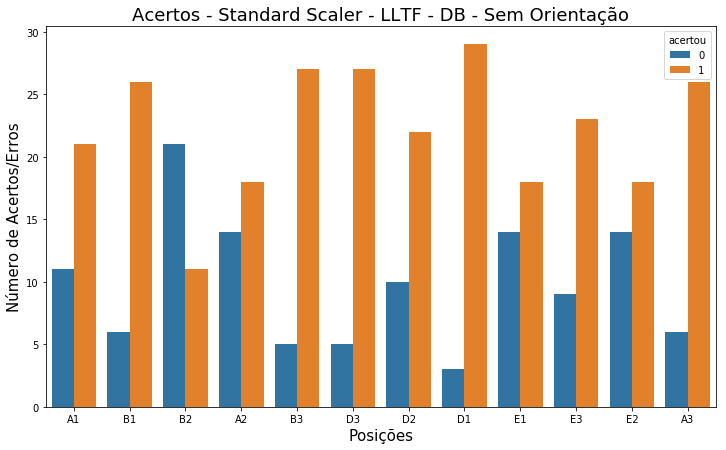

In [66]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Standard Scaler - LLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_stdscaler_db_LLTF_sem_orientacao.png")

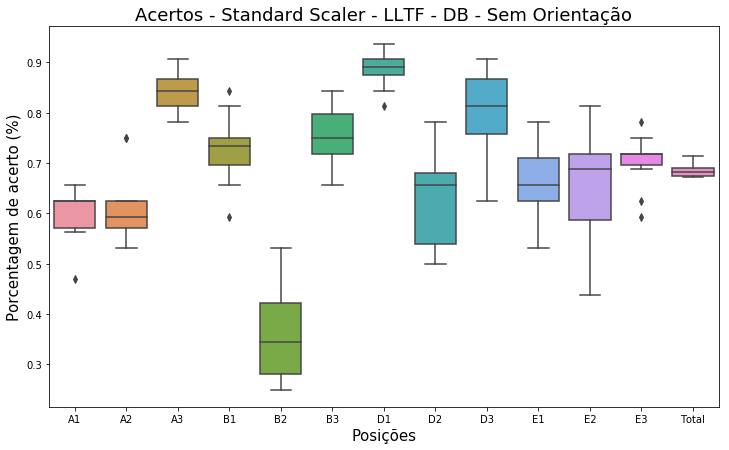

In [67]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Standard Scaler - LLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_stdscaler_db_LLTF_sem_orientacao.png")

In [68]:
#Usando LLTF apenas e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:70]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 82.29%
Total de acerto da repeticao 1: 80.47%
Total de acerto da repeticao 2: 80.99%
Total de acerto da repeticao 3: 81.51%
Total de acerto da repeticao 4: 81.77%
Total de acerto da repeticao 5: 79.43%
Total de acerto da repeticao 6: 81.77%
Total de acerto da repeticao 7: 82.55%
Total de acerto da repeticao 8: 82.03%
Total de acerto da repeticao 9: 79.17%


In [69]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_scaler_db.xlsx",sheet_name='percent_acertos_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.81250,0.81250,0.93750,0.78125,0.65625,0.90625,0.96875,0.78125,0.90625,0.78125,0.81250,0.71875,0.8229
1,0.81250,0.75000,0.93750,0.87500,0.68750,0.87500,0.96875,0.75000,0.87500,0.65625,0.68750,0.78125,0.8047
2,0.84375,0.65625,0.96875,0.71875,0.59375,0.93750,0.96875,0.81250,0.90625,0.78125,0.75000,0.78125,0.8099
3,0.68750,0.78125,0.93750,0.87500,0.78125,0.90625,0.90625,0.68750,0.90625,0.65625,0.84375,0.81250,0.8151
4,0.84375,0.59375,0.87500,0.84375,0.56250,0.90625,0.93750,0.81250,0.96875,0.71875,0.87500,0.87500,0.8177
5,0.78125,0.62500,0.90625,0.84375,0.68750,0.81250,0.87500,0.78125,0.93750,0.68750,0.71875,0.87500,0.7943
6,0.75000,0.68750,0.93750,0.75000,0.68750,0.90625,1.00000,0.81250,0.93750,0.65625,0.71875,0.96875,0.8177
7,0.81250,0.84375,0.81250,0.81250,0.78125,0.81250,0.93750,0.90625,0.93750,0.75000,0.62500,0.87500,0.8255
8,0.90625,0.75000,0.93750,0.78125,0.62500,0.87500,1.00000,0.62500,0.90625,0.78125,0.78125,0.87500,0.8203
9,0.75000,0.71875,0.90625,0.78125,0.75000,0.90625,0.96875,0.71875,0.93750,0.59375,0.71875,0.75000,0.7917


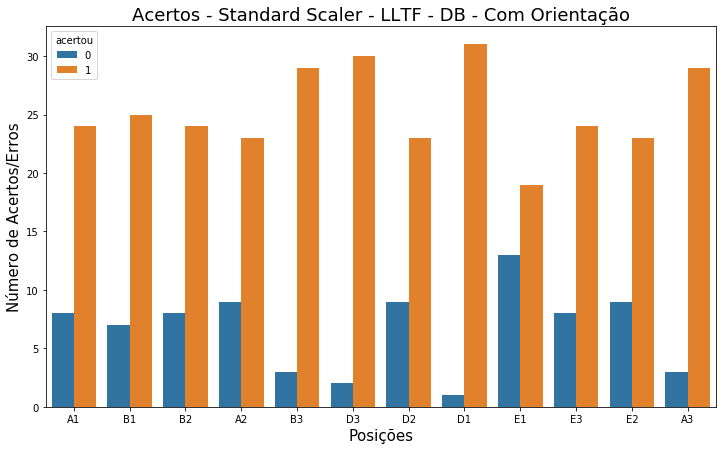

In [72]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Standard Scaler - LLTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_stdscaler_db_LLTF_com_orientacao.png")

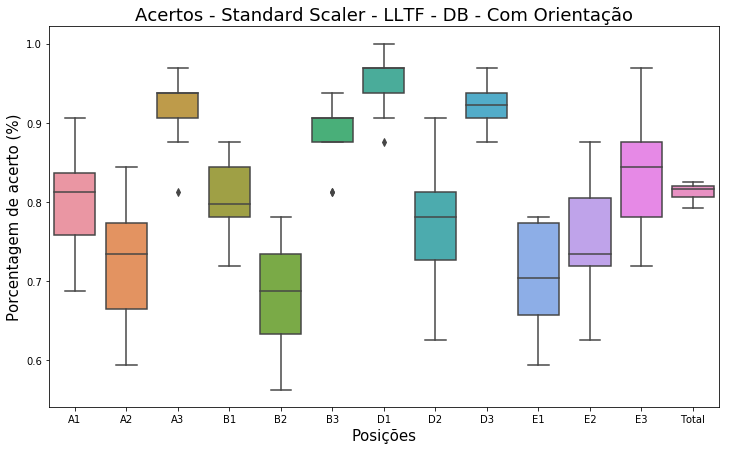

In [73]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Standard Scaler - LLTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_stdscaler_db_LLTF_com_orientacao.png")

In [74]:
#Usando HT-LTF apenas e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 73.18%
Total de acerto da repeticao 1: 69.01%
Total de acerto da repeticao 2: 71.35%
Total de acerto da repeticao 3: 71.09%
Total de acerto da repeticao 4: 71.09%
Total de acerto da repeticao 5: 67.71%
Total de acerto da repeticao 6: 71.35%
Total de acerto da repeticao 7: 69.01%
Total de acerto da repeticao 8: 70.05%
Total de acerto da repeticao 9: 72.92%


In [75]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_scaler_db.xlsx",sheet_name='percent_acertos_HT_sem_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.75000,0.56250,0.84375,0.65625,0.40625,0.87500,0.93750,0.78125,0.84375,0.65625,0.71875,0.75000,0.7318
1,0.53125,0.56250,0.84375,0.68750,0.46875,0.78125,0.90625,0.71875,0.87500,0.59375,0.50000,0.81250,0.6901
2,0.53125,0.71875,0.84375,0.59375,0.43750,0.84375,0.78125,0.81250,0.84375,0.71875,0.71875,0.71875,0.7135
3,0.71875,0.56250,0.87500,0.56250,0.37500,0.84375,0.93750,0.68750,0.84375,0.75000,0.65625,0.71875,0.7109
4,0.71875,0.59375,0.81250,0.68750,0.50000,0.84375,0.87500,0.68750,0.84375,0.59375,0.56250,0.81250,0.7109
5,0.59375,0.46875,0.90625,0.71875,0.31250,0.75000,0.81250,0.65625,0.84375,0.59375,0.78125,0.68750,0.6771
6,0.75000,0.53125,0.84375,0.78125,0.40625,0.81250,0.90625,0.59375,0.90625,0.53125,0.68750,0.81250,0.7135
7,0.62500,0.62500,0.81250,0.65625,0.43750,0.78125,0.87500,0.62500,0.78125,0.68750,0.65625,0.71875,0.6901
8,0.62500,0.59375,0.87500,0.59375,0.43750,0.71875,0.96875,0.71875,0.87500,0.65625,0.65625,0.68750,0.7005
9,0.59375,0.59375,0.96875,0.68750,0.43750,0.90625,0.93750,0.65625,0.90625,0.71875,0.68750,0.65625,0.7292


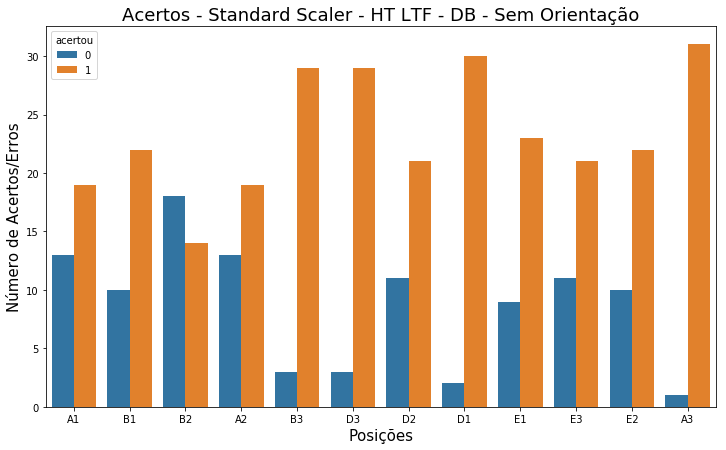

In [76]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Standard Scaler - HT LTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_stdscaler_db_HT_LTF_Sem_orientacao.png")

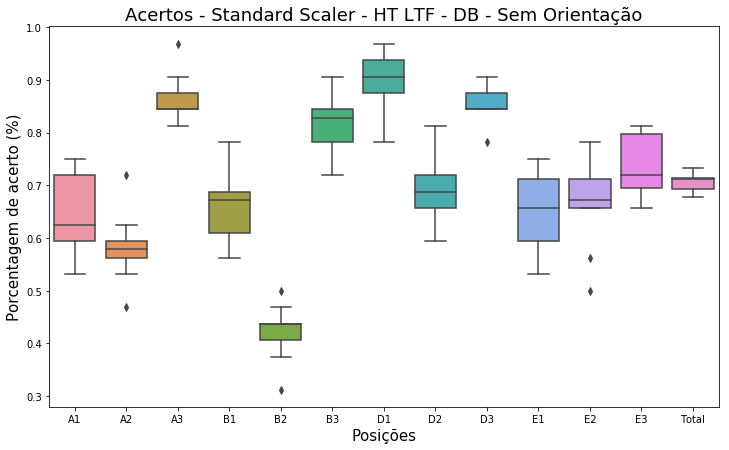

In [77]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Standard Scaler - HT LTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_stdscaler_db_HT_LTF_Sem_orientacao.png")

In [78]:
#Usando HT LTF apenas e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 82.03%
Total de acerto da repeticao 1: 82.55%
Total de acerto da repeticao 2: 82.55%
Total de acerto da repeticao 3: 80.47%
Total de acerto da repeticao 4: 81.51%
Total de acerto da repeticao 5: 80.73%
Total de acerto da repeticao 6: 82.03%
Total de acerto da repeticao 7: 82.29%
Total de acerto da repeticao 8: 82.29%
Total de acerto da repeticao 9: 85.68%


In [79]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_scaler_db.xlsx",sheet_name='percent_acertos_HT_com_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.81250,0.78125,0.96875,0.75000,0.65625,0.84375,0.96875,0.59375,0.96875,0.78125,0.84375,0.87500,0.8203
1,0.90625,0.75000,0.96875,0.87500,0.53125,0.96875,0.90625,0.71875,0.96875,0.78125,0.71875,0.81250,0.8255
2,0.84375,0.68750,0.93750,0.78125,0.71875,0.90625,0.93750,0.71875,0.87500,0.90625,0.78125,0.81250,0.8255
3,0.81250,0.71875,0.90625,0.90625,0.56250,0.78125,0.90625,0.75000,0.90625,0.75000,0.75000,0.90625,0.8047
4,0.84375,0.68750,0.90625,0.78125,0.65625,0.93750,0.96875,0.68750,0.90625,0.75000,0.71875,0.93750,0.8151
5,0.84375,0.62500,0.96875,0.81250,0.62500,0.81250,0.96875,0.78125,0.93750,0.81250,0.62500,0.87500,0.8073
6,0.90625,0.71875,0.90625,0.90625,0.71875,0.81250,0.93750,0.65625,0.87500,0.81250,0.71875,0.87500,0.8203
7,0.71875,0.78125,0.93750,0.75000,0.65625,0.84375,0.96875,0.62500,0.96875,0.75000,0.90625,0.96875,0.8229
8,0.71875,0.65625,0.87500,0.78125,0.75000,0.87500,1.00000,0.84375,0.96875,0.68750,0.90625,0.81250,0.8229
9,0.84375,0.84375,0.93750,0.78125,0.56250,0.93750,0.93750,0.84375,0.93750,0.87500,0.93750,0.84375,0.8568


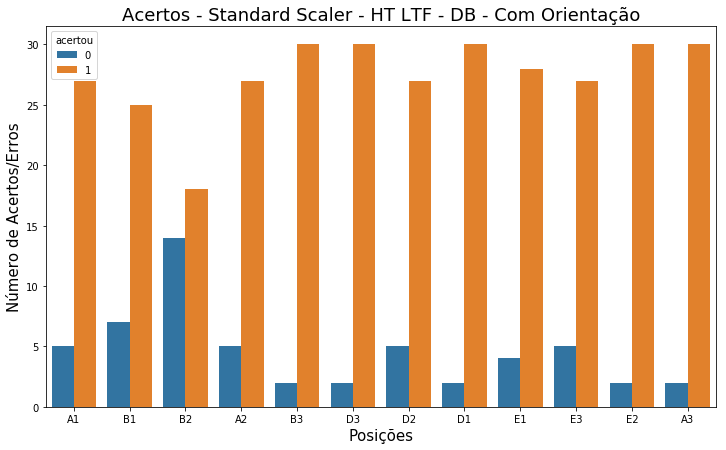

In [80]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Standard Scaler - HT LTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_stdscaler_db_HT_LTF_Com_orientacao.png")

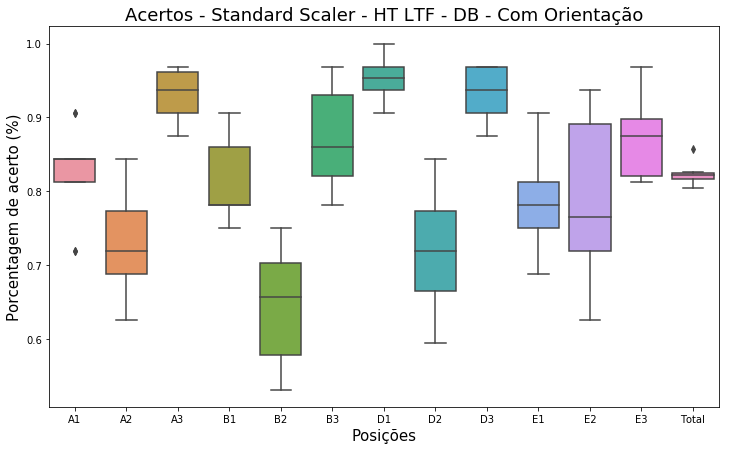

In [81]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Standard Scaler - HT LTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_stdscaler_db_HT_LTF_Com_orientacao.png")

In [82]:
#Usando HT-LTF + LLTF e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 69.01%
Total de acerto da repeticao 1: 71.09%
Total de acerto da repeticao 2: 71.88%
Total de acerto da repeticao 3: 70.57%
Total de acerto da repeticao 4: 71.35%
Total de acerto da repeticao 5: 71.88%
Total de acerto da repeticao 6: 67.97%
Total de acerto da repeticao 7: 69.53%
Total de acerto da repeticao 8: 71.35%
Total de acerto da repeticao 9: 70.31%


In [83]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_scaler_db.xlsx",sheet_name='perc_LLTF_HTLTF_no_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.68750,0.53125,0.68750,0.68750,0.43750,0.84375,0.87500,0.62500,0.93750,0.59375,0.62500,0.75000,0.6901
1,0.62500,0.53125,0.87500,0.59375,0.40625,0.84375,0.96875,0.68750,0.84375,0.68750,0.68750,0.78125,0.7109
2,0.62500,0.56250,0.81250,0.68750,0.43750,0.84375,0.90625,0.68750,0.96875,0.75000,0.68750,0.65625,0.7188
3,0.62500,0.56250,0.81250,0.71875,0.37500,0.81250,0.78125,0.68750,0.90625,0.81250,0.62500,0.75000,0.7057
4,0.65625,0.59375,0.87500,0.75000,0.43750,0.84375,0.87500,0.65625,0.87500,0.65625,0.65625,0.68750,0.7135
5,0.62500,0.50000,0.93750,0.75000,0.50000,0.84375,0.90625,0.68750,0.78125,0.65625,0.71875,0.71875,0.7188
6,0.62500,0.50000,0.84375,0.62500,0.34375,0.78125,1.00000,0.68750,0.81250,0.65625,0.53125,0.75000,0.6797
7,0.59375,0.68750,0.90625,0.62500,0.40625,0.62500,0.90625,0.59375,0.87500,0.71875,0.71875,0.68750,0.6953
8,0.71875,0.68750,0.90625,0.75000,0.46875,0.81250,0.84375,0.56250,0.93750,0.62500,0.59375,0.65625,0.7135
9,0.53125,0.59375,0.81250,0.68750,0.40625,0.81250,0.90625,0.71875,0.87500,0.62500,0.65625,0.81250,0.7031


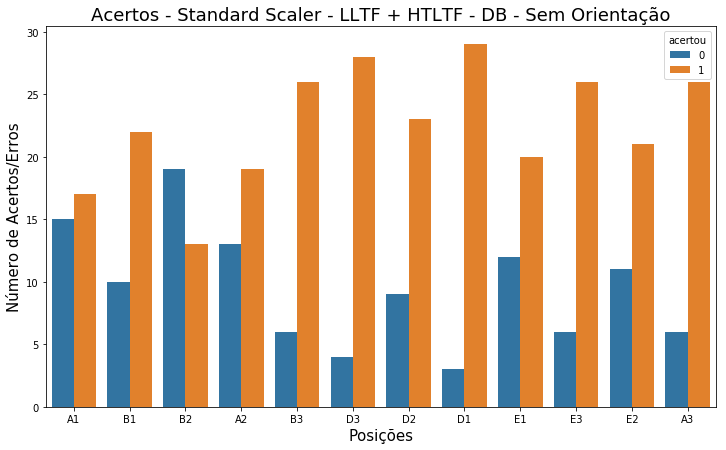

In [84]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Standard Scaler - LLTF + HTLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_scaler_db_LLTF_HT_LTF_Sem_dir.png")

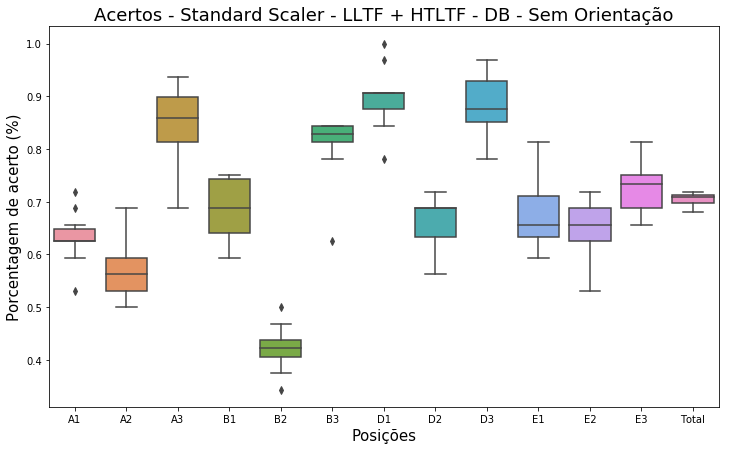

In [85]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Standard Scaler - LLTF + HTLTF - DB - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_scaler_db_LLTF_HT_LTF_Sem_dir.png")

In [99]:
#Usando HT-LTF + LLTF e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 82.29%
Total de acerto da repeticao 1: 81.51%
Total de acerto da repeticao 2: 80.99%
Total de acerto da repeticao 3: 81.51%
Total de acerto da repeticao 4: 83.59%
Total de acerto da repeticao 5: 81.25%
Total de acerto da repeticao 6: 84.38%
Total de acerto da repeticao 7: 82.81%
Total de acerto da repeticao 8: 82.29%
Total de acerto da repeticao 9: 81.25%


In [100]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_scaler_db.xlsx",sheet_name='perc_LLTF_HTLTF_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.96875,0.78125,0.90625,0.87500,0.56250,0.84375,1.00000,0.75000,0.87500,0.75000,0.75000,0.81250,0.8229
1,0.71875,0.81250,0.90625,0.84375,0.53125,1.00000,0.90625,0.87500,0.87500,0.71875,0.78125,0.81250,0.8151
2,0.75000,0.75000,0.96875,0.87500,0.56250,0.87500,0.93750,0.65625,0.96875,0.81250,0.75000,0.81250,0.8099
3,0.87500,0.71875,0.96875,0.78125,0.56250,0.90625,0.90625,0.75000,0.87500,0.84375,0.78125,0.81250,0.8151
4,0.78125,0.78125,0.93750,0.90625,0.62500,0.93750,1.00000,0.71875,0.87500,0.81250,0.75000,0.90625,0.8359
5,0.81250,0.75000,0.87500,0.87500,0.68750,0.84375,0.96875,0.81250,0.87500,0.68750,0.81250,0.75000,0.8125
6,0.84375,0.78125,0.84375,0.87500,0.71875,0.87500,0.96875,0.75000,0.90625,0.81250,0.87500,0.87500,0.8438
7,0.87500,0.78125,0.96875,0.75000,0.65625,0.96875,0.96875,0.71875,1.00000,0.71875,0.71875,0.81250,0.8281
8,0.81250,0.68750,0.81250,0.84375,0.71875,0.90625,0.90625,0.81250,0.90625,0.75000,0.87500,0.84375,0.8229
9,0.84375,0.78125,0.96875,0.84375,0.50000,1.00000,0.93750,0.65625,0.87500,0.81250,0.81250,0.71875,0.8125


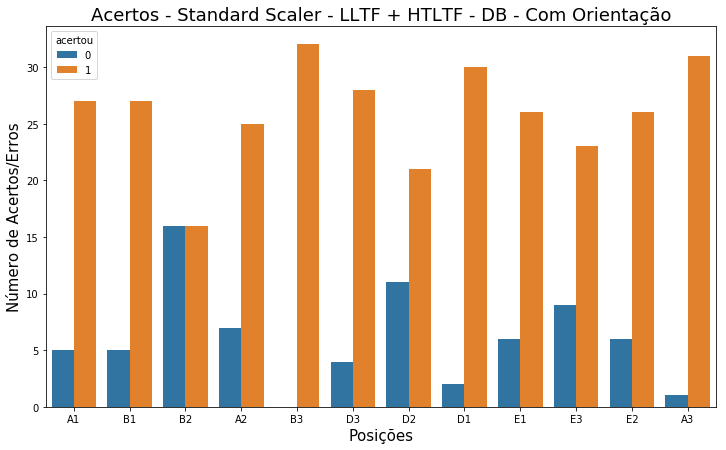

In [101]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Standard Scaler - LLTF + HTLTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_scaler_db_LLTF_HT_LTF_dir.png")

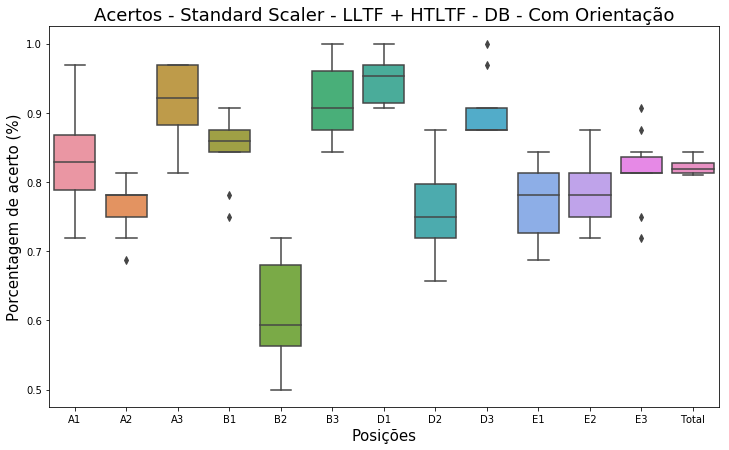

In [102]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Standard Scaler - LLTF + HTLTF - DB - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_scaler_db_LLTF_HT_LTF_dir.png")